# Linear Regression with SciKit-Learn

We saw how to create a very simple best fit line, but now let's greatly expand our toolkit to start thinking about the considerations of overfitting, underfitting, model evaluation, as well as multiple features!

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Sample Data

This sample data is from ISLR. It displays sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

In [81]:
df = pd.read_csv("Advertising.csv")

In [82]:
len(df)

200

In [83]:
df = df.head(21)

### Expanding the Questions

Previously, we explored **Is there a relationship between *total* advertising spend and *sales*?** as well as predicting the total sales for some value of total spend. Now we want to expand this to **What is the relationship between each advertising channel (TV,Radio,Newspaper) and sales?**

### Multiple Features (N-Dimensional)

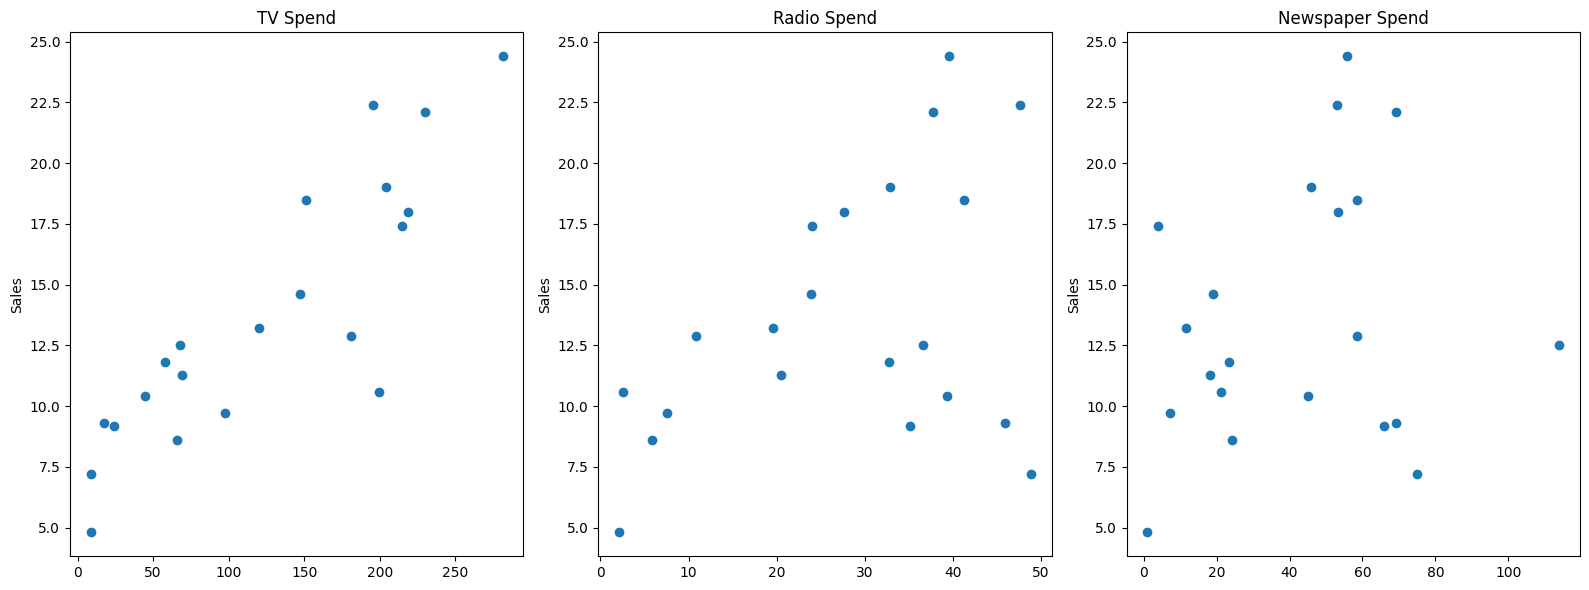

In [84]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

## Introducing SciKit Learn

We will work a lot with the scitkit learn library, so get comfortable with its model estimator syntax, as well as exploring its incredibly useful documentation!

---

In [85]:
X = df.drop('sales',axis=1)
y = df['sales']

## Train | Test Split

Make sure you have watched the Machine Learning Overview videos on Supervised Learning to understand why we do this step

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
# random_state: 
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [88]:
X_train

,TV,radio,newspaper
12,23.8,35.1,65.9
10,66.1,5.8,24.2
0,230.1,37.8,69.2
5,8.7,48.9,75.0
14,204.1,32.9,46.0
4,180.8,10.8,58.4
8,8.6,2.1,1.0
13,97.5,7.6,7.2
9,199.8,2.6,21.2
15,195.4,47.7,52.9


In [89]:
y_train

12     9.2
10     8.6
0     22.1
5      7.2
14    19.0
4     12.9
8      4.8
13     9.7
9     10.6
15    22.4
20    18.0
6     11.8
17    24.4
11    17.4
Name: sales, dtype: float64

In [90]:
X_test

,TV,radio,newspaper
7,120.2,19.6,11.6
18,69.2,20.5,18.3
2,17.2,45.9,69.3
3,151.5,41.3,58.5
1,44.5,39.3,45.1
16,67.8,36.6,114.0
19,147.3,23.9,19.1


In [91]:
y_test

7     13.2
18    11.3
2      9.3
3     18.5
1     10.4
16    12.5
19    14.6
Name: sales, dtype: float64

## Creating a Model (Estimator)

#### Import a model class from a model family

In [92]:
from sklearn.linear_model import LinearRegression

#### Create an instance of the model with parameters

In [93]:
model = LinearRegression()

### Fit/Train the Model on the training data

**Make sure you only fit to the training data, in order to fairly evaluate your model's performance on future data**

In [94]:
model.fit(X_train,y_train)

LinearRegression()

# Understanding and utilizing the Model

-----

## Evaluation on the Test Set

### Metrics

Make sure you've viewed the video on these metrics!
The three most common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

### Calculate Performance on Test Set

We want to fairly evaluate our model, so we get performance metrics on the test set (data the model has never seen before).

In [95]:
# X_test

In [96]:
# We only pass in test features
# The model predicts its own y hat
# We can then compare these results to the true y test label value
test_predictions = model.predict(X_test)

In [97]:
test_predictions

array([12.74014996,  9.91554439, 10.30339308, 17.1081751 , 11.29455602,
        9.92889671, 14.8034832 ])

In [98]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [99]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [100]:
MAE

1.1298094489477144

In [101]:
MSE

1.7891945212160612

In [102]:
RMSE

1.3376077605995194

In [73]:
df['sales'].mean()

12.08

### Plotting Residuals

It's also important to plot out residuals and check for normal distribution, this helps us understand if Linear Regression was a valid model choice.

In [74]:
# Predictions on training and testing sets
# Doing residuals separately will alert us to any issue with the split call
test_predictions = model.predict(X_test)

In [75]:
# If our model was perfect, these would all be zeros
test_res = y_test - test_predictions

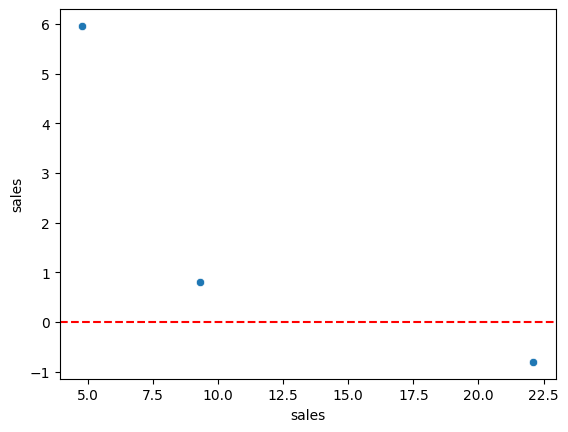

In [76]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [77]:
import scipy as sp

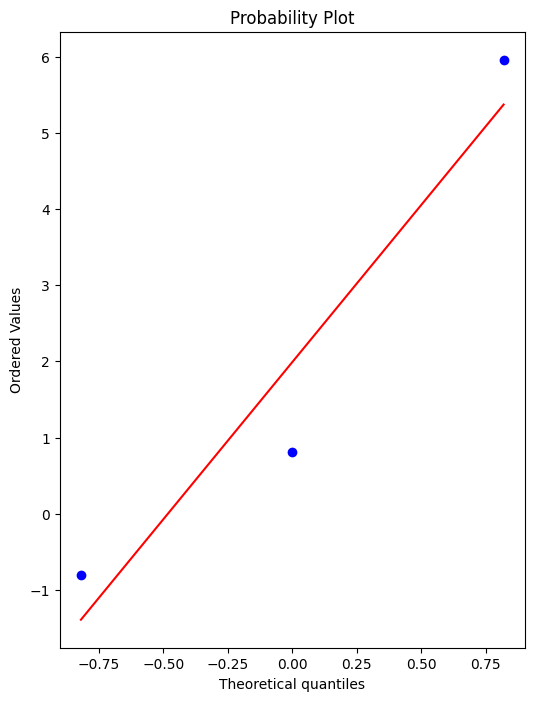

In [78]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

-----------

## Retraining Model on Full Data

If we're satisfied with the performance on the test data, before deploying our model to the real world, we should retrain on all our data. (If we were not satisfied, we could update parameters or choose another model.).

In [68]:
final_model = LinearRegression()

In [69]:
final_model.fit(X,y)

LinearRegression()

Note how it may not really make sense to recalulate RMSE metrics here, since the model has already seen all the data, its not a fair judgement of performance to calculate RMSE on data its already seen.

## Deployment, Predictions, and Model Attributes

### Final Model Fit

Note, we can only do this since we only have 3 features, for any more it becomes unreasonable.

In [79]:
y_hat = final_model.predict(X)

NameError: name 'final_model' is not defined

NameError: name 'y_hat' is not defined

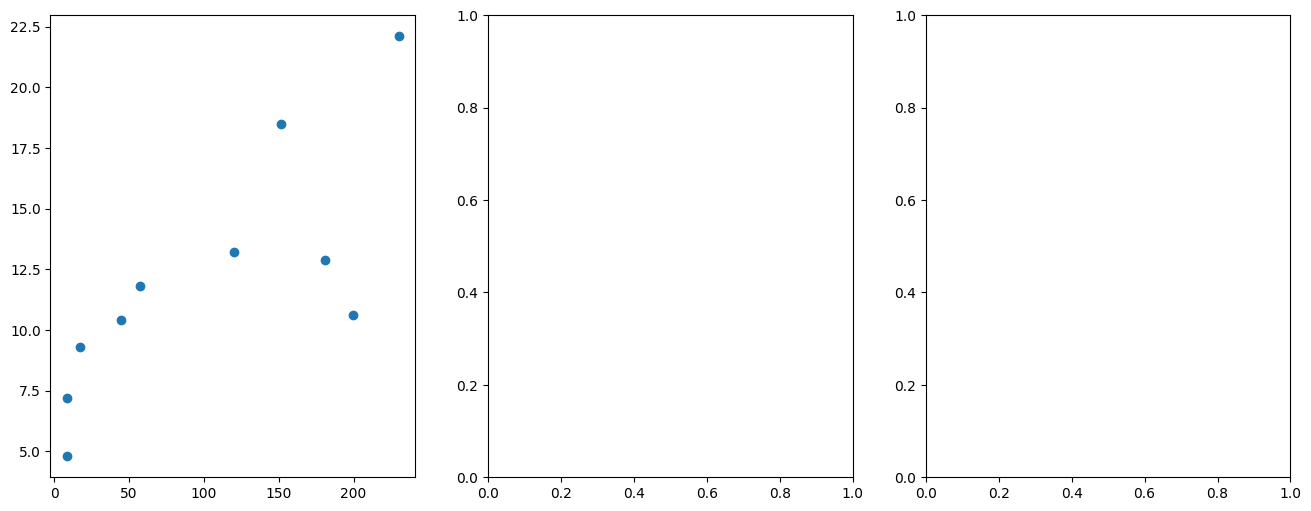

In [80]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

### Residuals

In [72]:
residuals = y_hat - y

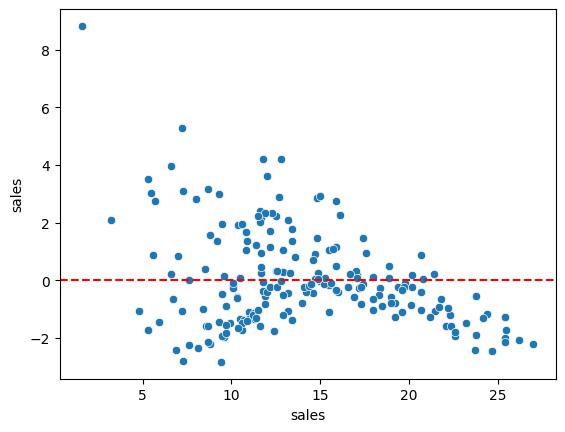

In [73]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

### Coefficients

In [74]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [75]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [251]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Prediction on New Data

Recall , X_test data set looks *exactly* the same as brand new data, so we simply need to call .predict() just as before to predict sales for a new advertising campaign.

**Our next ad campaign will have a total spend of 149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?**

In [252]:
campaign = [[149,22,12]]

In [253]:
final_model.predict(campaign)

array([13.893032])

-----

## Model Persistence (Saving and Loading a Model)

In [254]:
from joblib import dump, load

In [255]:
dump(final_model, 'sales_model.joblib') 

['sales_model.joblib']

In [256]:
loaded_model = load('sales_model.joblib')

In [257]:
loaded_model.predict(campaign)

array([13.893032])

## Up next...
### Is this the best possible performance? Its a simple model still, let's expand on the linear regresion model by taking a further look a regularization!

-------
--------